# Embeddings

https://www.youtube.com/watch?v=wSXGlvTR9UM

In [1]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Merge, Flatten

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv('data/cmc.data',header=None,names=['Age','Education','H_education',
                                                     'num_child','Religion', 'Employ',
                                                     'H_occupation','living_standard',
                                                     'Media_exposure','contraceptive'])
df.head()

,Age,Education,H_education,num_child,Religion,Employ,H_occupation,living_standard,Media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [3]:
df.isnull().any()

Age                False
Education          False
H_education        False
num_child          False
Religion           False
Employ             False
H_occupation       False
living_standard    False
Media_exposure     False
contraceptive      False
dtype: bool

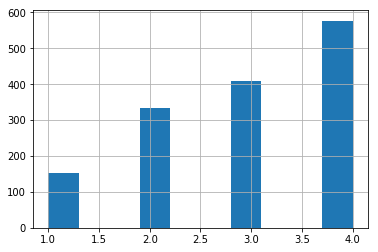

In [4]:
df.Education.hist()

In [5]:
df.shape

(1473, 10)

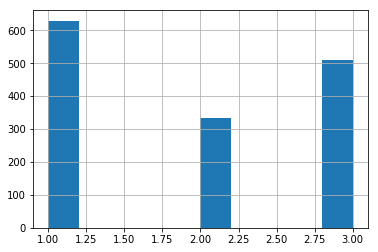

In [6]:
df.contraceptive.hist()

In [7]:
df.dtypes

Age                int64
Education          int64
H_education        int64
num_child          int64
Religion           int64
Employ             int64
H_occupation       int64
living_standard    int64
Media_exposure     int64
contraceptive      int64
dtype: object

In [8]:
def one_hot_encoding(idx):
    y = np.zeros((len(idx),max(idx)+1))
    y[np.arange(len(idx)), idx] = 1
    return y

In [9]:
scaler = StandardScaler()
df[['Age','num_child']] = scaler.fit_transform(df[['Age','num_child']]) 

In [10]:
x = df[['Age','num_child','Employ','Media_exposure']].values
y = one_hot_encoding(df.contraceptive.values-1)

liv_cats = df.living_standard.max()
edu_cats = df.Education.max()

liv = df.living_standard.values - 1
liv_one_hot = one_hot_encoding(liv)
edu = df.Education.values - 1
edu_one_hot = one_hot_encoding(edu)

train_x, test_x, train_liv, \
test_liv, train_edu, test_edu, train_y, test_y = train_test_split(x,liv_one_hot,edu_one_hot,y,test_size=0.1, random_state=1)

In [11]:
train_x = np.hstack([train_x, train_edu, train_liv])
test_x = np.hstack([test_x, test_edu, test_liv])

In [12]:
train_x.shape

(1325, 12)

In [13]:
train_edu.shape

(1325, 4)

In [14]:
train_liv.shape

(1325, 4)

In [15]:
train_x.shape

(1325, 12)

In [16]:
model = Sequential()
model.add(Dense(input_dim=train_x.shape[1],output_dim=12))
model.add(Activation('relu'))
model.add(Dense(output_dim=3))
model.add(Activation('softmax'))

model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, nb_epoch=100, verbose=2)

/srv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=12, units=12)`
  
/srv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3)`
  after removing the cwd from sys.path.
/srv/venv/lib/python3.6/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
 - 0s - loss: 1.1035 - acc: 0.3570
Epoch 2/100
 - 0s - loss: 1.0356 - acc: 0.4189
Epoch 3/100
 - 0s - loss: 1.0105 - acc: 0.4558
Epoch 4/100
 - 0s - loss: 0.9943 - acc: 0.4777
Epoch 5/100
 - 0s - loss: 0.9826 - acc: 0.4921
Epoch 6/100
 - 0s - loss: 0.9734 - acc: 0.5170
Epoch 7/100
 - 0s - loss: 0.9660 - acc: 0.5238
Epoch 8/100
 - 0s - loss: 0.9601 - acc: 0.5253
Epoch 9/100
 - 0s - loss: 0.9553 - acc: 0.5313
Epoch 10/100
 - 0s - loss: 0.9510 - acc: 0.5366
Epoch 11/100
 - 0s - loss: 0.9472 - acc: 0.5411
Epoch 12/100
 - 0s - loss: 0.9442 - acc: 0.5426
Epoch 13/100
 - 0s - loss: 0.9416 - acc: 0.5411
Epoch 14/100
 - 0s - loss: 0.9390 - acc: 0.5457
Epoch 15/100
 - 0s - loss: 0.9368 - acc: 0.5494
Epoch 16/100
 - 0s - loss: 0.9350 - acc: 0.5502
Epoch 17/100
 - 0s - loss: 0.9333 - acc: 0.5487
Epoch 18/100
 - 0s - loss: 0.9316 - acc: 0.5487
Epoch 19/100
 - 0s - loss: 0.9302 - acc: 0.5532
Epoch 20/100
 - 0s - loss: 0.9287 - acc: 0.5502
Epoch 21/100
 - 0s - loss: 0.9275 - acc: 0.5547
E

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
activation_1 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


In [18]:
for w in model.get_weights():
    print(w.shape)

(12, 12)
(12,)
(12, 3)
(3,)


In [19]:
model.evaluate(test_x, test_y, batch_size=256)

148/148 [==============================] - 0s 106us/step


[0.857330322265625, 0.62162160873413086]

In [20]:
model.predict(test_x[:10])

array([[ 0.22435404,  0.25911319,  0.51653278],
       [ 0.78002536,  0.10350878,  0.11646585],
       [ 0.20055015,  0.20492277,  0.59452707],
       [ 0.41666317,  0.29395291,  0.28938392],
       [ 0.74099553,  0.11176234,  0.14724216],
       [ 0.15620874,  0.55819649,  0.28559476],
       [ 0.08360577,  0.47027186,  0.44612232],
       [ 0.86324924,  0.06630629,  0.07044449],
       [ 0.76971763,  0.02090011,  0.20938225],
       [ 0.62090158,  0.13734818,  0.2417502 ]], dtype=float32)

In [21]:
liv

array([2, 3, 3, ..., 3, 1, 3])

In [22]:
train_x, test_x, train_liv, \
test_liv, train_edu, test_edu, train_y, test_y = train_test_split(x,liv,edu,y,test_size=0.1, random_state=1)

In [23]:
# Input layer for religion
encoder_liv = Sequential()
encoder_liv.add(Embedding(liv_cats,4,input_length=1))
encoder_liv.add(Flatten())

# Input layer for religion
encoder_edu = Sequential()
encoder_edu.add(Embedding(edu_cats,4,input_length=1))
encoder_edu.add(Flatten())

# Input layer for triggers(x_b)
dense_x = Sequential()
dense_x.add(Dense(4, input_dim=x.shape[1]))

model = Sequential()
model.add(Merge([encoder_liv, encoder_edu, dense_x], mode='concat'))
# model.add(Activation('relu'))
model.add(Dense(output_dim=12))
model.add(Activation('relu'))
model.add(Dense(output_dim=3))
model.add(Activation('softmax'))

model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

/srv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  app.launch_new_instance()
/srv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=12)`
/srv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3)`


In [24]:
model.fit([train_liv[:,None], train_edu[:,None], train_x], train_y, nb_epoch=100, verbose=2)

/srv/venv/lib/python3.6/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
 - 0s - loss: 1.0591 - acc: 0.3819
Epoch 2/100
 - 0s - loss: 1.0136 - acc: 0.4611
Epoch 3/100
 - 0s - loss: 0.9911 - acc: 0.5079
Epoch 4/100
 - 0s - loss: 0.9757 - acc: 0.5147
Epoch 5/100
 - 0s - loss: 0.9646 - acc: 0.5275
Epoch 6/100
 - 0s - loss: 0.9558 - acc: 0.5449
Epoch 7/100
 - 0s - loss: 0.9496 - acc: 0.5502
Epoch 8/100
 - 0s - loss: 0.9447 - acc: 0.5487
Epoch 9/100
 - 0s - loss: 0.9404 - acc: 0.5509
Epoch 10/100
 - 0s - loss: 0.9371 - acc: 0.5547
Epoch 11/100
 - 0s - loss: 0.9342 - acc: 0.5555
Epoch 12/100
 - 0s - loss: 0.9319 - acc: 0.5585
Epoch 13/100
 - 0s - loss: 0.9298 - acc: 0.5585
Epoch 14/100
 - 0s - loss: 0.9278 - acc: 0.5600
Epoch 15/100
 - 0s - loss: 0.9262 - acc: 0.5577
Epoch 16/100
 - 0s - loss: 0.9249 - acc: 0.5585
Epoch 17/100
 - 0s - loss: 0.9234 - acc: 0.5585
Epoch 18/100
 - 0s - loss: 0.9221 - acc: 0.5585
Epoch 19/100
 - 0s - loss: 0.9212 - acc: 0.5585
Epoch 20/100
 - 0s - loss: 0.9201 - acc: 0.5608
Epoch 21/100
 - 0s - loss: 0.9192 - acc: 0.5608
E

In [25]:
dense_x.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [26]:
encoder_liv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 4)              16        
_________________________________________________________________
flatten_1 (Flatten)          (None, 4)                 0         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_1 (Merge)              (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 12)                156       
_________________________________________________________________
activation_3 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_4 (Activation)    (None, 3)                 0         
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________


In [29]:
w

array([-0.03459764, -0.0414084 ,  0.08308488], dtype=float32)

In [30]:
a = model.get_weights()
a

[[array([[-0.24218529,  0.02131504,  0.18017061, -0.31837648],
         [-0.08772275,  0.05833552, -0.02912114, -0.02456018],
         [ 0.01278354, -0.14527349, -0.04106711, -0.04103126],
         [ 0.10906993, -0.11211494, -0.15981759,  0.1070981 ]], dtype=float32)],
 [],
 [array([[ 0.18042257, -0.25124502,  0.12817037,  0.33393061],
         [-0.09384611,  0.06969731, -0.20515049,  0.20368673],
         [ 0.18778136,  0.12759644, -0.05201294,  0.06126536],
         [ 0.26510286,  0.3008981 ,  0.05010751, -0.2635963 ]], dtype=float32)],
 [],
 [array([[-0.72550207,  0.94954085, -0.11295334,  0.37485689],
         [ 0.89734524,  0.35077366, -0.78273892, -0.34648567],
         [ 0.2271363 , -0.46460667,  0.08805165,  0.21304809],
         [ 0.29424098, -0.26945329,  0.8246845 ,  0.44144556]], dtype=float32),
  array([ 0.0849677 ,  0.00836967, -0.08397176,  0.09402502], dtype=float32)],
 [array([[-0.33728456, -0.461869  , -0.06529257,  0.01786307, -0.63016003,
          -0.49922279, -0.2

In [31]:
model.evaluate([test_liv[:,None], test_edu[:,None], test_x],test_y, batch_size=256)

148/148 [==============================] - 0s 244us/step


[0.841450035572052, 0.57432430982589722]

In [32]:
p = model.predict([test_liv[:,None], test_edu[:,None], test_x], batch_size=256)
p[:5]

array([[ 0.30880749,  0.30944815,  0.38174433],
       [ 0.87711394,  0.04827987,  0.07460617],
       [ 0.25350222,  0.14875318,  0.59774458],
       [ 0.39716119,  0.34088394,  0.26195484],
       [ 0.81546819,  0.08372078,  0.10081098]], dtype=float32)

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_1 (Merge)              (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 12)                156       
_________________________________________________________________
activation_3 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_4 (Activation)    (None, 3)                 0         
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________


In [34]:
model = Sequential()
model.add(Dense(4, input_dim=train_x.shape[1]))
model.add(Activation('relu'))
model.add(Dense(output_dim=3))
model.add(Activation('softmax'))

model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, nb_epoch=100)

/srv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3)`
  after removing the cwd from sys.path.
/srv/venv/lib/python3.6/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
1325/1325 [==============================] - 0s 195us/step - loss: 0.6718 - acc: 0.6584
Epoch 2/100
1325/1325 [==============================] - 0s 93us/step - loss: 0.6497 - acc: 0.6611
Epoch 3/100
1325/1325 [==============================] - 0s 104us/step - loss: 0.6374 - acc: 0.6621
Epoch 4/100
1325/1325 [==============================] - 0s 125us/step - loss: 0.6286 - acc: 0.6654
Epoch 5/100
1325/1325 [==============================] - 0s 68us/step - loss: 0.6219 - acc: 0.6679
Epoch 6/100
1325/1325 [==============================] - 0s 64us/step - loss: 0.6166 - acc: 0.6712
Epoch 7/100
1325/1325 [==============================] - 0s 67us/step - loss: 0.6123 - acc: 0.6717
Epoch 8/100
1325/1325 [==============================] - 0s 88us/step - loss: 0.6087 - acc: 0.6745
Epoch 9/100
1325/1325 [==============================] - 0s 86us/step - loss: 0.6058 - acc: 0.6780
Epoch 10/100
1325/1325 [==============================] - 0s 82us/step - loss: 0.6034 - acc: 0.6775
Epoch 

Epoch 83/100
1325/1325 [==============================] - 0s 60us/step - loss: 0.5816 - acc: 0.6964
Epoch 84/100
1325/1325 [==============================] - 0s 59us/step - loss: 0.5815 - acc: 0.6966
Epoch 85/100
1325/1325 [==============================] - 0s 52us/step - loss: 0.5814 - acc: 0.6971
Epoch 86/100
1325/1325 [==============================] - 0s 62us/step - loss: 0.5813 - acc: 0.6966
Epoch 87/100
1325/1325 [==============================] - 0s 60us/step - loss: 0.5812 - acc: 0.6964
Epoch 88/100
1325/1325 [==============================] - 0s 61us/step - loss: 0.5811 - acc: 0.6964
Epoch 89/100
1325/1325 [==============================] - 0s 51us/step - loss: 0.5810 - acc: 0.6961
Epoch 90/100
1325/1325 [==============================] - 0s 53us/step - loss: 0.5810 - acc: 0.6958
Epoch 91/100
1325/1325 [==============================] - 0s 52us/step - loss: 0.5809 - acc: 0.6961
Epoch 92/100
1325/1325 [==============================] - 0s 65us/step - loss: 0.5808 - acc: 0.6961


In [35]:
model.evaluate(test_x,test_y,batch_size=256)

148/148 [==============================] - 0s 227us/step


[0.55446743965148926, 0.71846842765808105]

In [36]:
model.fit?

In [ ]:
test complete; Gopal